<a href="https://colab.research.google.com/github/Kamruzzaman2200/Ai/blob/main/Fedarate_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import os
from collections import defaultdict
import shap
from lime.lime_tabular import LimeTabularExplainer
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Smoking Dataset/smoking.csv")
df.columns = df.columns.str.strip()

In [24]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
gender,55692.0,0.635657,0.481250,0.0,0.00,1.0,1.00,1.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0


In [27]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors), size=0.8)
    plt.tick_params(axis='both', labelsize=0, length=0)  # corrected here
    return customPalette

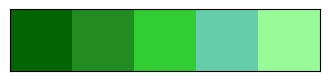

In [30]:
pal = ['#006400', '#228B22', '#32CD32', '#66CDAA', '#98FB98']
custom_palette(pal)

<Axes: >

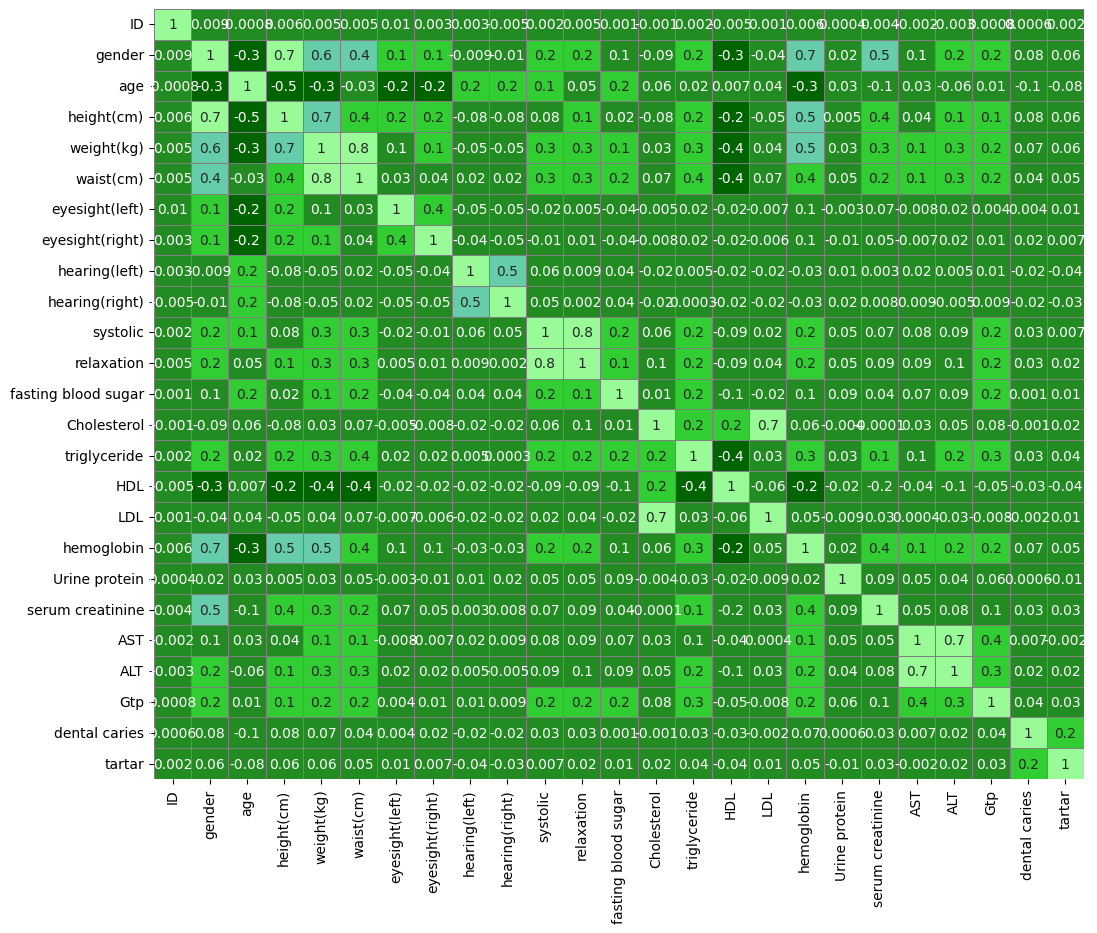

In [31]:
fig, ax=plt.subplots(figsize=(12,10))
sns.heatmap(X.corr(),annot=True,fmt='0.1g',cmap=pal,cbar=False,linewidths=0.5,linecolor='grey')

# Step 2: Encode categorical columns (except target "smoking")

In [6]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != "smoking":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le



# Encode target

In [7]:
df["smoking"] = LabelEncoder().fit_transform(df["smoking"].astype(str))

# Step 3: Clean Data

In [8]:
df = df.loc[:, (df != df.iloc[0]).any()]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Step 4: Features & Labels

In [9]:
X = df.drop(columns=["smoking"])
y = df["smoking"].values

# Standardize

In [10]:
X_scaled = StandardScaler().fit_transform(X)

# Feature Selection

In [11]:
k = min(30, X_scaled.shape[1])
selector = SelectKBest(f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]


# Final scaling

In [12]:
X_final = StandardScaler().fit_transform(X[selected_features])

# Balance dataset

In [13]:
X_bal, y_bal = SMOTE(random_state=42).fit_resample(X_final, y)

# Step 5: Non-IID Partitioning

In [14]:
def dirichlet_partition(X, y, n_clients, alpha=0.5):
    labels = np.unique(y)
    n_samples = len(y)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    client_data = [[] for _ in range(n_clients)]
    label_indices = {label: np.where(y_shuffled == label)[0] for label in labels}

    for label in labels:
        idxs = label_indices[label]
        n_label_samples = len(idxs)
        proportions = np.random.dirichlet([alpha] * n_clients)
        split_points = (np.cumsum(proportions) * n_label_samples).astype(int)[:-1]
        split_indices = np.split(idxs, split_points)
        for client_id, split in enumerate(split_indices):
            client_data[client_id].extend(split)

    client_splits = []
    for client_id in range(n_clients):
        client_indices = client_data[client_id]
        client_X = X_shuffled[client_indices]
        client_y = y_shuffled[client_indices]
        client_splits.append((client_X, client_y))

    return client_splits


# Step 6: Define Neural Network

In [18]:
class IntrusionDetectionNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(IntrusionDetectionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 7: Define SmartContract (aggregation logic)

In [19]:
class SmartContract:
    def __init__(self, strategy="fedavg", min_clients=2):
        self.strategy = strategy
        self.min_clients = min_clients

    def verify_and_aggregate(self, updates, prev_global=None, local_steps=None):
        if self.strategy in ["fedavg", "fedprox"]:
            # Simple average
            new_state = defaultdict(float)
            for k in updates[0].keys():
                new_state[k] = sum(u[k] for u in updates) / len(updates)
            return new_state

        elif self.strategy == "fednova":
            # Weighted aggregation
            total_steps = sum(local_steps)
            new_state = defaultdict(float)
            for k in updates[0].keys():
                new_state[k] = sum(u[k] * s for u, s in zip(updates, local_steps)) / total_steps
            return new_state

        elif self.strategy == "feddyn":
            # Use previous global state
            new_state = defaultdict(float)
            for k in updates[0].keys():
                new_state[k] = sum(u[k] for u in updates) / len(updates)
            return new_state

        return None

# Step 8: Federated Training

In [20]:
log_dir = "/content/runs_FL"
os.makedirs(log_dir, exist_ok=True)

input_size = X_bal.shape[1]
num_classes = 2
rounds = 40
local_epochs = 10
num_clients = 10
learning_rate = 0.001
strategies = ["fedavg", "fedprox", "fednova", "feddyn"]
results = {}

for strategy in strategies:
    results[strategy] = {}
    print(f"Training with strategy: {strategy}, clients: {num_clients}")
    client_splits = dirichlet_partition(X_bal, y_bal, num_clients, alpha=0.5)
    clients = [(client_X, client_y) for client_X, client_y in client_splits]
    global_model = IntrusionDetectionNet(input_size, num_classes)
    prev_global_state = global_model.state_dict()
    contract = SmartContract(strategy=strategy, min_clients=max(2, num_clients // 10))
    writer = SummaryWriter(log_dir=f"{log_dir}/{strategy}_{num_clients}")
    acc_list = []

    for r in range(rounds):
        updates, local_steps = [], []
        for client_x, client_y in clients:
            model = IntrusionDetectionNet(input_size, num_classes)
            model.load_state_dict(global_model.state_dict())
            opt = optim.Adam(model.parameters(), lr=learning_rate)
            xt = torch.tensor(client_x, dtype=torch.float32)
            yt = torch.tensor(client_y, dtype=torch.long)
            for _ in range(local_epochs):
                opt.zero_grad()
                out = model(xt)
                loss = nn.CrossEntropyLoss()(out, yt)
                loss.backward()
                opt.step()
            updates.append(model.state_dict())
            local_steps.append(len(client_x) * local_epochs)

        if strategy == "feddyn":
            agg = contract.verify_and_aggregate(updates, prev_global=prev_global_state)
        elif strategy == "fednova":
            agg = contract.verify_and_aggregate(updates, local_steps=local_steps)
        else:
            agg = contract.verify_and_aggregate(updates)

        if agg:
            global_model.load_state_dict(agg)
            prev_global_state = agg

        with torch.no_grad():
            xt_all = torch.tensor(X_bal, dtype=torch.float32)
            yt_all = torch.tensor(y_bal, dtype=torch.long)
            preds = global_model(xt_all).argmax(dim=1)
            acc = (preds == yt_all).float().mean().item()
            acc_list.append(acc)
            writer.add_scalar("Accuracy", acc, r)

    writer.close()
    results[strategy][num_clients] = {"accuracy": acc_list, "final_acc": acc_list[-1]}
    print(f"Final accuracy for {strategy}, {num_clients} clients: {acc_list[-1]:.4f}")

Training with strategy: fedavg, clients: 10
Final accuracy for fedavg, 10 clients: 0.7690
Training with strategy: fedprox, clients: 10
Final accuracy for fedprox, 10 clients: 0.7724
Training with strategy: fednova, clients: 10
Final accuracy for fednova, 10 clients: 0.7750
Training with strategy: feddyn, clients: 10
Final accuracy for feddyn, 10 clients: 0.7504


# Step 9: SHAP and LIME

  0%|          | 0/10 [00:00<?, ?it/s]

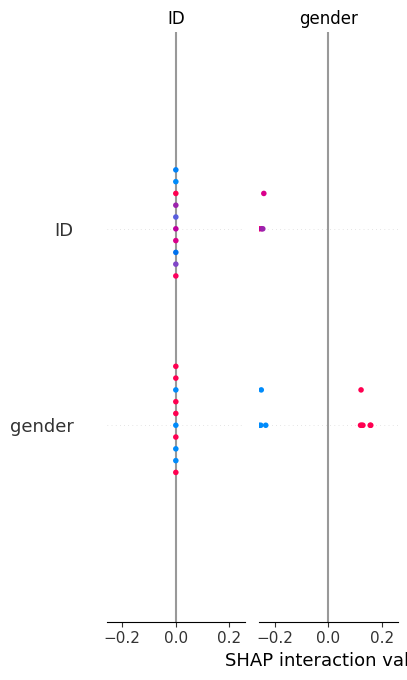

In [21]:
def model_predict(X):
    global_model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32)
        logits = global_model(X_tensor)
        probs = torch.softmax(logits, dim=1).numpy()
    return probs

shap_explainer = shap.KernelExplainer(model_predict, X_bal[:1000])
shap_values = shap_explainer.shap_values(X_bal[:10], nsamples=100)
shap.summary_plot(shap_values, X_bal[:10], feature_names=selected_features.tolist(), plot_type="bar")

lime_explainer = LimeTabularExplainer(
    X_bal,
    feature_names=selected_features.tolist(),
    class_names=["Non-Smoker", "Smoker"],
    discretize_continuous=True
)
exp = lime_explainer.explain_instance(X_bal[0], model_predict, num_features=10)
exp.show_in_notebook()